# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.utils import resample

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
#I've decided to change the model I chose in the last assignment. 
#I'm instead choosing airBNB listings and choosing the positivity/negativity of a overall rating score as the label. 
#and using categorical rating scores as features.

data = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(data, header = 0)
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# COLUMN SELECTION
# Firstly, I'll be selecting only columns with "review_scores" in the name.
# I did this since the only features I need for this model are the review scores for each category.
# I saved this new dataframe to a variable titled "new_df".

new_df = df[['review_scores_cleanliness',
             'review_scores_checkin', 
             'review_scores_communication',
             'review_scores_location', 
             'review_scores_value', 
             'review_scores_rating']].copy()
new_df

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating
0,4.62,4.76,4.79,4.86,4.41,4.70
1,4.49,4.78,4.80,4.71,4.64,4.45
2,5.00,5.00,5.00,4.50,5.00,5.00
3,3.73,4.66,4.42,4.87,4.36,4.21
4,4.82,4.97,4.95,4.94,4.92,4.91
...,...,...,...,...,...,...
28017,5.00,5.00,5.00,3.00,1.00,5.00
28018,5.00,5.00,5.00,5.00,5.00,5.00
28019,1.00,1.00,5.00,5.00,2.00,1.00
28020,5.00,5.00,5.00,5.00,5.00,5.00


In [5]:
# CHANGING COLUMN NAMES
# I felt like the names could be more concise and readible, so I decided to change the names of the feature columns.
# I did this by using the rename function on the "new_df" variable, and setting the parameter "inplace" to True
# so that these new column names can replace the previous ones without the function having to produce a copy of it.

new_df.rename(columns = {'review_scores_cleanliness' : 'cleanliness_rating',
                                                      'review_scores_checkin' : 'checkin_rating', 
                                                      'review_scores_communication' : 'communication_rating',
                                                      'review_scores_location' : 'location_rating', 
                                                      'review_scores_value' : 'value_rating'}, inplace = True)

# Since I chose the overall rating to be the label score, I decided for that to be represented in the name,
# following the same conventions as the feature labels, and the same function previously used.

new_label = pd.cut(new_df.review_scores_rating, bins = [-1, 2.5, 6], labels = ['Negative', 'Positive'])
new_df.insert(6, 'label', new_label)
new_df.drop(columns = 'review_scores_rating', axis = 1, inplace = True)

new_df

,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,label
0,4.62,4.76,4.79,4.86,4.41,Positive
1,4.49,4.78,4.80,4.71,4.64,Positive
2,5.00,5.00,5.00,4.50,5.00,Positive
3,3.73,4.66,4.42,4.87,4.36,Positive
4,4.82,4.97,4.95,4.94,4.92,Positive
...,...,...,...,...,...,...
28017,5.00,5.00,5.00,3.00,1.00,Positive
28018,5.00,5.00,5.00,5.00,5.00,Positive
28019,1.00,1.00,5.00,5.00,2.00,Negative
28020,5.00,5.00,5.00,5.00,5.00,Positive


In [6]:
# NULL CHECK
# I'm checking for null values to see if there is any missing data that needs to be handled.
new_df.label.isnull().values.any()

False

In [7]:
# OUTLIER CHECK
# Since there are no null values, it's also important to check for outlier values that can indicate an error in the
# data collection process or skew the data distribution.

# Normally I would visualize the data on a plot to see any noticiable outliers.
# However, since the expected range of this data that falls on a 5-star rating system is 0-5,
# an outlier can be easily defined as any data points that are less than 0, or greater than 5.

# To do this, I'm checking the minimum and maximum of each respective column.

print("MINIMUM VALUES (expected to be greater than or equal to 0)")
print(new_df.drop(columns = 'label').min())
print()
print("MAXIMUM VALUES (expected to be less than or equal to 5)")
print(new_df.drop(columns = 'label').max())

MINIMUM VALUES (expected to be greater than or equal to 0)
cleanliness_rating      0.0
checkin_rating          0.0
communication_rating    0.0
location_rating         0.0
value_rating            0.0
dtype: float64

MAXIMUM VALUES (expected to be less than or equal to 5)
cleanliness_rating      5.0
checkin_rating          5.0
communication_rating    5.0
location_rating         5.0
value_rating            5.0
dtype: float64


In [8]:
#UPSAMPLING / DOWNSAMPLING
print("BEFORE DOWNSAMPLING:")
print("Number of Positive Labels =", sum(new_df.label == 'Positive'))
print("Number of Negative Labels =", sum(new_df.label == 'Negative'))

downsampling = resample(new_df[new_df['label'] == 'Positive'],
                       replace = True,
                       n_samples = len(new_df[new_df['label'] == 'Negative']),
                       random_state = 42)

print("")
print("AFTER DOWNSAMPLING:")
print("Number of Positive Labels =", sum(downsampling.shape))
print("Number of Negative Labels =", sum(new_df.label == 'Negative'))

new_df = pd.concat([downsampling, new_df[new_df['label'] == 'Negative']])
new_df

BEFORE DOWNSAMPLING:
Number of Positive Labels = 27689
Number of Negative Labels = 333

AFTER DOWNSAMPLING:
Number of Positive Labels = 339
Number of Negative Labels = 333


,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,label
23898,5.00,5.00,5.0,5.00,5.00,Positive
15878,5.00,5.00,5.0,4.33,4.67,Positive
862,5.00,5.00,5.0,5.00,5.00,Positive
5409,4.00,5.00,5.0,4.00,5.00,Positive
21753,4.89,4.89,5.0,4.67,4.56,Positive
...,...,...,...,...,...,...
27848,5.00,5.00,3.0,1.00,3.00,Negative
27929,1.00,1.00,1.0,1.00,1.00,Negative
27964,1.00,1.00,1.0,1.00,2.00,Negative
27997,1.00,1.00,1.0,1.00,1.00,Negative


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [9]:
# I'm going to implement Logistic Regression

#As shown in a few cells later, 0.1 is shown to be the best choice for C, but after some 
#fine tuning, I realized the best choice was 0.09, just being slightly better than 0.1

model = LogisticRegression(C = 0.09)

X = new_df.drop(columns = 'label', axis = 1)
y = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

model.fit(X_train, y_train)
probability_predictions = model.predict_proba(X_test)

df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

l_loss = log_loss(y_test, probability_predictions)
class_label_predictions = model.predict(X_test)

print('Class labels: ' + str(class_label_predictions[0:5]))

# evaluate on the train dataset
class_label_predictions_y = model.predict(X_train)
train_acc = accuracy_score(y_train, class_label_predictions_y)
print("")
print("Training Accuracy", train_acc)
 # evaluate on the test dataset

acc_score = accuracy_score(y_test, class_label_predictions)

print('Testing Accuracy: ' + str(acc_score))

#This shows that my model isn't overfitting, both training and testing models are going well

Class Prediction Probabilities: 
 Class: False  Class: True
     0.021452     0.978548
     0.043337     0.956663
     0.018944     0.981056
     0.929275     0.070725
     0.014453     0.985547
Class labels: ['Positive' 'Positive' 'Positive' 'Negative' 'Positive']

Training Accuracy 0.9775784753363229
Testing Accuracy: 0.9590909090909091


In [10]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
     # 1. Create the  scikit-learn LogisticRegression model object below and assign to variable 'model'
      # YOUR CODE HERE
    
    model = LogisticRegression(C = c)
    
  
    # 2. Fit the model to the training data below
     # YOUR CODE HERE
        
    model.fit(X_train, y_train)
    
    
    # 3. Make predictions on the test data using the predict_proba() method and assign the result to the 
    # variable 'probability_predictions' below
     # YOUR CODE HERE
        
    probability_predictions = model.predict_proba(X_test)
        
        
        
    # 4. Compute the log loss on 'probability_predictions' and save the result to the variable 'l_loss' below
     # YOUR CODE HERE
        
    l_loss = log_loss(y_test, probability_predictions)
        
        
    # 5. Make predictions on the test data using the predict() method and assign the result to the 
    # variable 'class_label_predictions' below
     # YOUR CODE HERE
        
    class_label_predictions = model.predict(X_test)
        
    # 6. Compute the accuracy score on 'class_label_predictions' and save the result to the variable 'acc_score' below
     # YOUR CODE HERE
        
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return l_loss, acc_score


In [11]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.1680215400977097
Accuracy: 0.9590909090909091


In [12]:
cs = [10**i for i in range(-10,10)]
cs

ll_cs = []
acc_cs = []

for C in cs:
    ll_cs.append(train_test_LR(X_train, y_train, X_test, y_test, C)[0])
    acc_cs.append(train_test_LR(X_train, y_train, X_test, y_test, C)[1])
    
ll_cs

#C = 0.1 is the best hyperparameter

[0.6939603317528511,
 0.6939596087631066,
 0.6939523113082333,
 0.6938793917537114,
 0.6931515422178817,
 0.6859886369711742,
 0.6244192590817517,
 0.3888631137106067,
 0.19218976053767473,
 0.146747362010408,
 0.1680215400977097,
 0.18452157719854223,
 0.18755863374153356,
 0.1878924972805379,
 0.18792343418176882,
 0.1879303409691712,
 0.18792752410848554,
 0.1879278083882224,
 0.18792783882809935,
 0.18792784188915734]

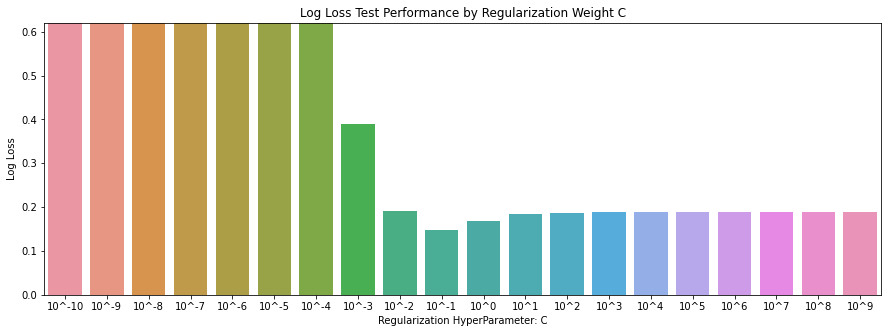

In [13]:
plt.figure(figsize=(15,5)) 

ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0.0, 0.62])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

#This graph visualizes and supports the idea of C = 0.1 being the idea weight for this model.

In [14]:
# Compute and print model's accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: ' + str(acc_score))

# Display a confusion matrix
print('Confusion Matrix for the model: ')

pd.DataFrame(
confusion_matrix(y_test, class_label_predictions, labels=['Positive', 'Negative']),
columns=['Predicted: Positive Review', 'Predicted: Negative Review'],
index=['Actual: Positive Review', 'Actual: Negative Review']
)

Accuracy score: 0.9590909090909091
Confusion Matrix for the model: 


,Predicted: Positive Review,Predicted: Negative Review
Actual: Positive Review,109,5
Actual: Negative Review,4,102


In [15]:
#NOTE: I failed to have access to my computer for the past few days due to a 
#damaged charger, so this exploration isn't as thorough or coherent with my 
#reasoning and choices as I would have liked it to have been. Mostly toward the end. 

#However if time wasn't a constraint, I would've also explored
#the correlaion between each feature and the label, determining which traits of an AirBNB
#do users care about the most when it comes to their overall experience.